<a href="https://colab.research.google.com/github/mugil02/dsp-mugilraja-Ais/blob/main/MUGILARAJA(ML_2)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASET

In [162]:
speed = pd.read_csv("/content/speed_dating.csv")
speed.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,match
0,0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,0
1,0,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,0
2,1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[0-4],1.0,1
3,0,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1
4,0,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,4.0,[0-4],[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1


In [163]:
speed.shape

(8378, 120)

VISUALIZING DATA

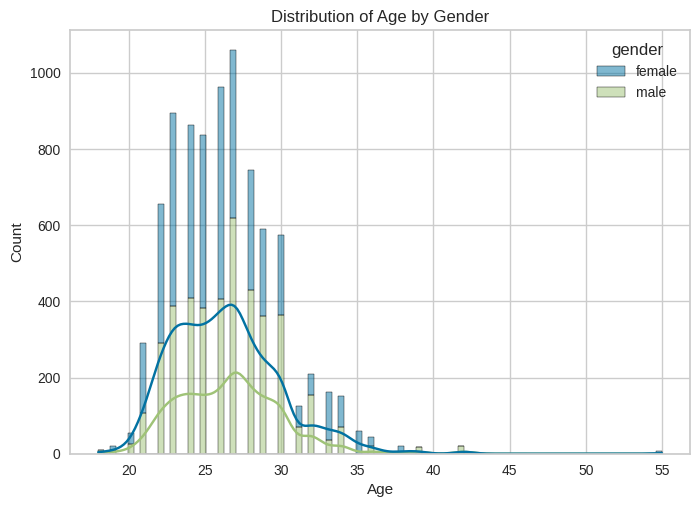

In [164]:
sns.histplot(data=speed, x="age", hue="gender", multiple="stack", kde=True)
plt.title("Distribution of Age by Gender")
plt.xlabel("Age")
plt.show()

SELECTING IMPORTANT FEATUERS FROM THE DATASET AND PREPROCESSING IT 

In [165]:
X = ['age','ambition', 'funny' ,'sports', 'exercise', 'dining', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',  'movies', 'music', 'shopping', 'yoga', 'match']
imp = speed.dropna(subset=X)


In [166]:
data = speed[X].copy()

In [167]:
data

,age,ambition,funny,sports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,movies,music,shopping,yoga,match
0,21.0,7.0,8.0,9.0,8.0,9.0,1.0,5.0,1.0,5.0,6.0,9.0,10.0,9.0,8.0,1.0,0
1,21.0,7.0,8.0,9.0,8.0,9.0,1.0,5.0,1.0,5.0,6.0,9.0,10.0,9.0,8.0,1.0,0
2,21.0,7.0,8.0,9.0,8.0,9.0,1.0,5.0,1.0,5.0,6.0,9.0,10.0,9.0,8.0,1.0,1
3,21.0,7.0,8.0,9.0,8.0,9.0,1.0,5.0,1.0,5.0,6.0,9.0,10.0,9.0,8.0,1.0,1
4,21.0,7.0,8.0,9.0,8.0,9.0,1.0,5.0,1.0,5.0,6.0,9.0,10.0,9.0,8.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,25.0,7.0,7.0,8.0,5.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,9.0,10.0,7.0,3.0,0
8374,25.0,7.0,7.0,8.0,5.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,9.0,10.0,7.0,3.0,0
8375,25.0,7.0,7.0,8.0,5.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,9.0,10.0,7.0,3.0,0
8376,25.0,7.0,7.0,8.0,5.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,9.0,10.0,7.0,3.0,0


SCALING THE DATA FROM 1 TO 10 USING MIN MAX

In [168]:

data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [169]:
data.describe()

,age,ambition,funny,sports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,movies,music,shopping,yoga,match
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,3.032263,7.281630,7.941445,6.430652,6.243495,7.785868,7.045512,6.165600,3.489709,6.173550,6.011160,5.310695,8.128348,7.852471,5.634758,4.902399,2.482454
std,0.862707,1.988727,1.376721,2.607237,2.407542,1.746698,2.027590,2.302367,1.677543,2.241461,1.497992,2.518080,1.523615,1.783416,2.596826,2.434469,3.338525
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.459459,6.625000,7.428571,5.000000,5.000000,7.000000,5.500000,4.600000,2.285714,4.600000,5.500000,3.000000,7.300000,7.000000,4.000000,2.800000,1.000000
50%,2.945946,7.750000,7.428571,7.000000,6.000000,8.000000,7.300000,6.400000,2.928571,6.400000,6.250000,6.000000,8.200000,8.000000,6.000000,4.600000,1.000000
75%,3.432432,8.875000,8.714286,9.000000,8.000000,9.000000,8.200000,8.200000,4.857143,8.200000,7.000000,7.000000,9.100000,9.000000,8.000000,6.400000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [170]:
data.head()


,age,ambition,funny,sports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,movies,music,shopping,yoga,match
0,1.72973,6.625,7.428571,9.0,8.0,9.0,1.9,5.5,1.642857,5.5,4.75,9.0,10.0,9.0,8.0,1.9,1.0
1,1.72973,6.625,7.428571,9.0,8.0,9.0,1.9,5.5,1.642857,5.5,4.75,9.0,10.0,9.0,8.0,1.9,1.0
2,1.72973,6.625,7.428571,9.0,8.0,9.0,1.9,5.5,1.642857,5.5,4.75,9.0,10.0,9.0,8.0,1.9,10.0
3,1.72973,6.625,7.428571,9.0,8.0,9.0,1.9,5.5,1.642857,5.5,4.75,9.0,10.0,9.0,8.0,1.9,10.0
4,1.72973,6.625,7.428571,9.0,8.0,9.0,1.9,5.5,1.642857,5.5,4.75,9.0,10.0,9.0,8.0,1.9,10.0


FITTING DATA

In [171]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

CENTROID-BASED clustering

In [172]:

kmns = KMeans(n_init='auto',
              random_state=123)
kmns.fit(X)

KMeans(n_init='auto', random_state=123)

In [173]:
clusters = kmns.labels_
clusters


array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

USING ELBOW METHOD

In [174]:
inertia = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



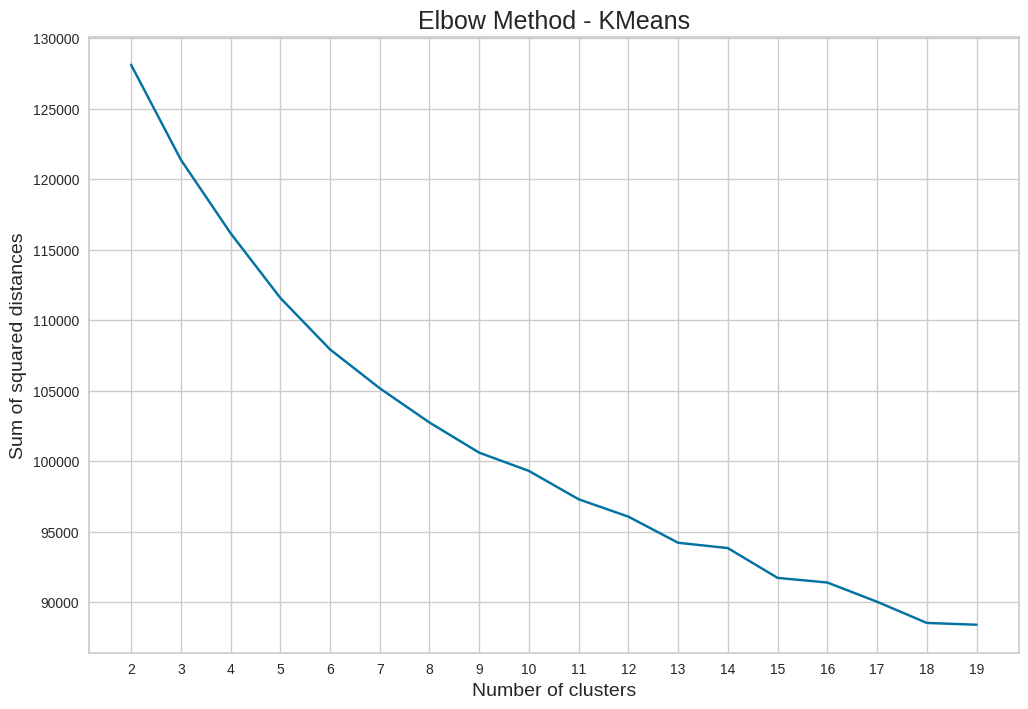

In [175]:
plt.figure(figsize=(12,8))
g = sns.lineplot(y=inertia, x=np.arange(2,20))
g.set_ylabel('Sum of squared distances', fontsize=14)
g.set_xlabel('Number of clusters', fontsize=14)
g.set_xticks(range(2,20))
g.set_title('Elbow Method - KMeans', fontsize=18)
plt.grid('on')
plt.show()

VISULAIZING USING YELLOWBRICK

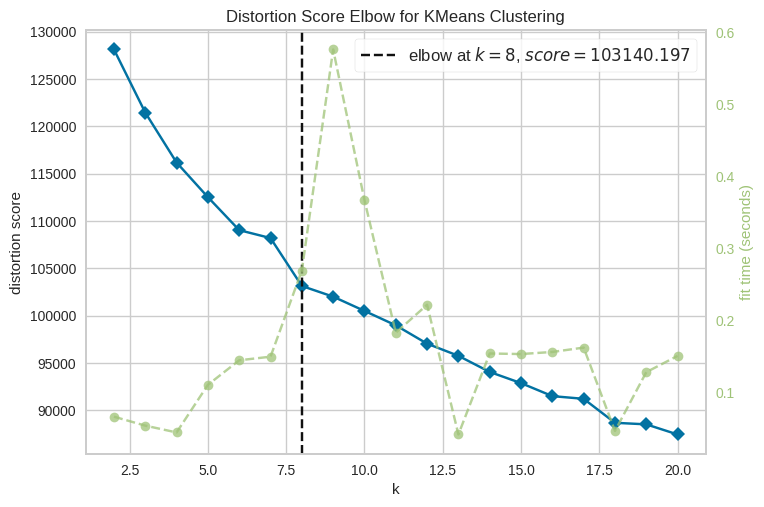

In [176]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init='auto',
               random_state=123)

visualizer = KElbowVisualizer(model,
                              metric='distortion', 
                              k=20)

visualizer.fit(X)
visualizer.show()
plt.show()

In [177]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

USING SILHOUTTE SCORE

In [178]:
sil_scores = []
for k in range(2,20):
    kmns = KMeans(n_clusters=k,
                  n_init='auto',
                  random_state=123)
    kmns.fit(X)
    sil_score = silhouette_score(X, kmns.labels_)
    sil_scores.append(sil_score)

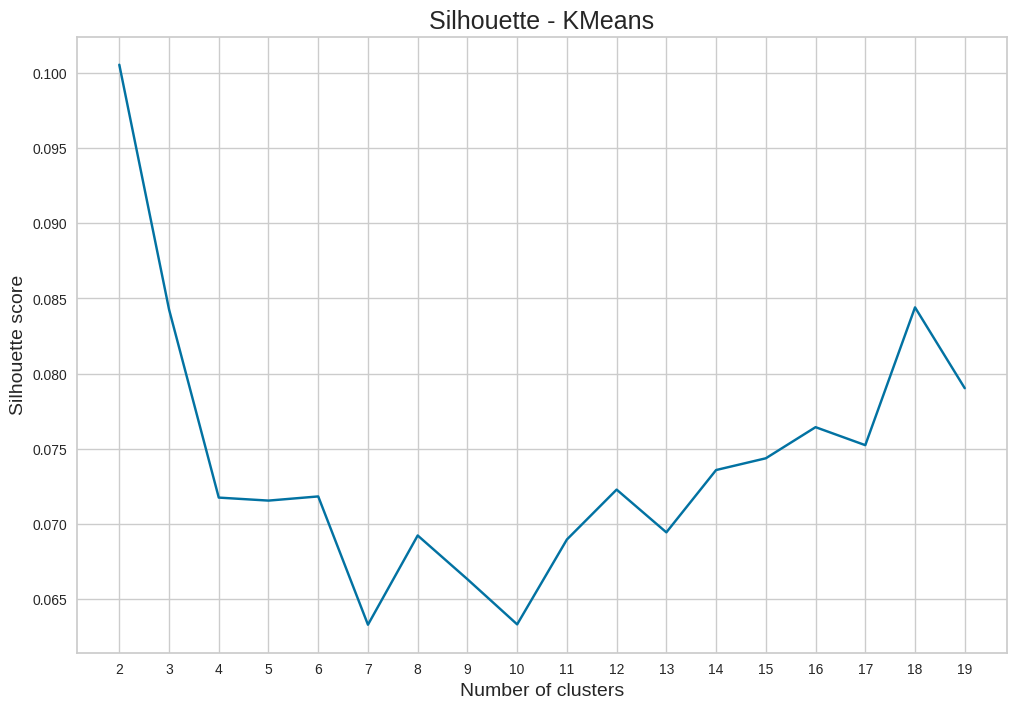

In [179]:
plt.figure(figsize=(12,8))
g = sns.lineplot(y=sil_scores, x=np.arange(2,20))
g.set_ylabel('Silhouette score', fontsize=14)
g.set_xlabel('Number of clusters', fontsize=14)
g.set_xticks(range(2,20))
g.set_title('Silhouette - KMeans', fontsize=18)
plt.grid('on')
plt.show()

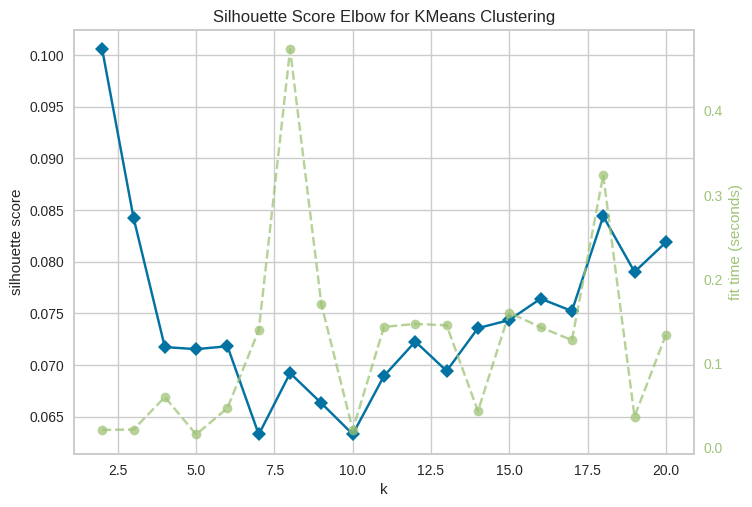

In [180]:
model = KMeans(n_init='auto',
               random_state=123)

visualizer = KElbowVisualizer(model,
                              metric='silhouette', 
                              locate_elbow=False,
                              k=20)

visualizer.fit(X)
visualizer.show()
plt.show()

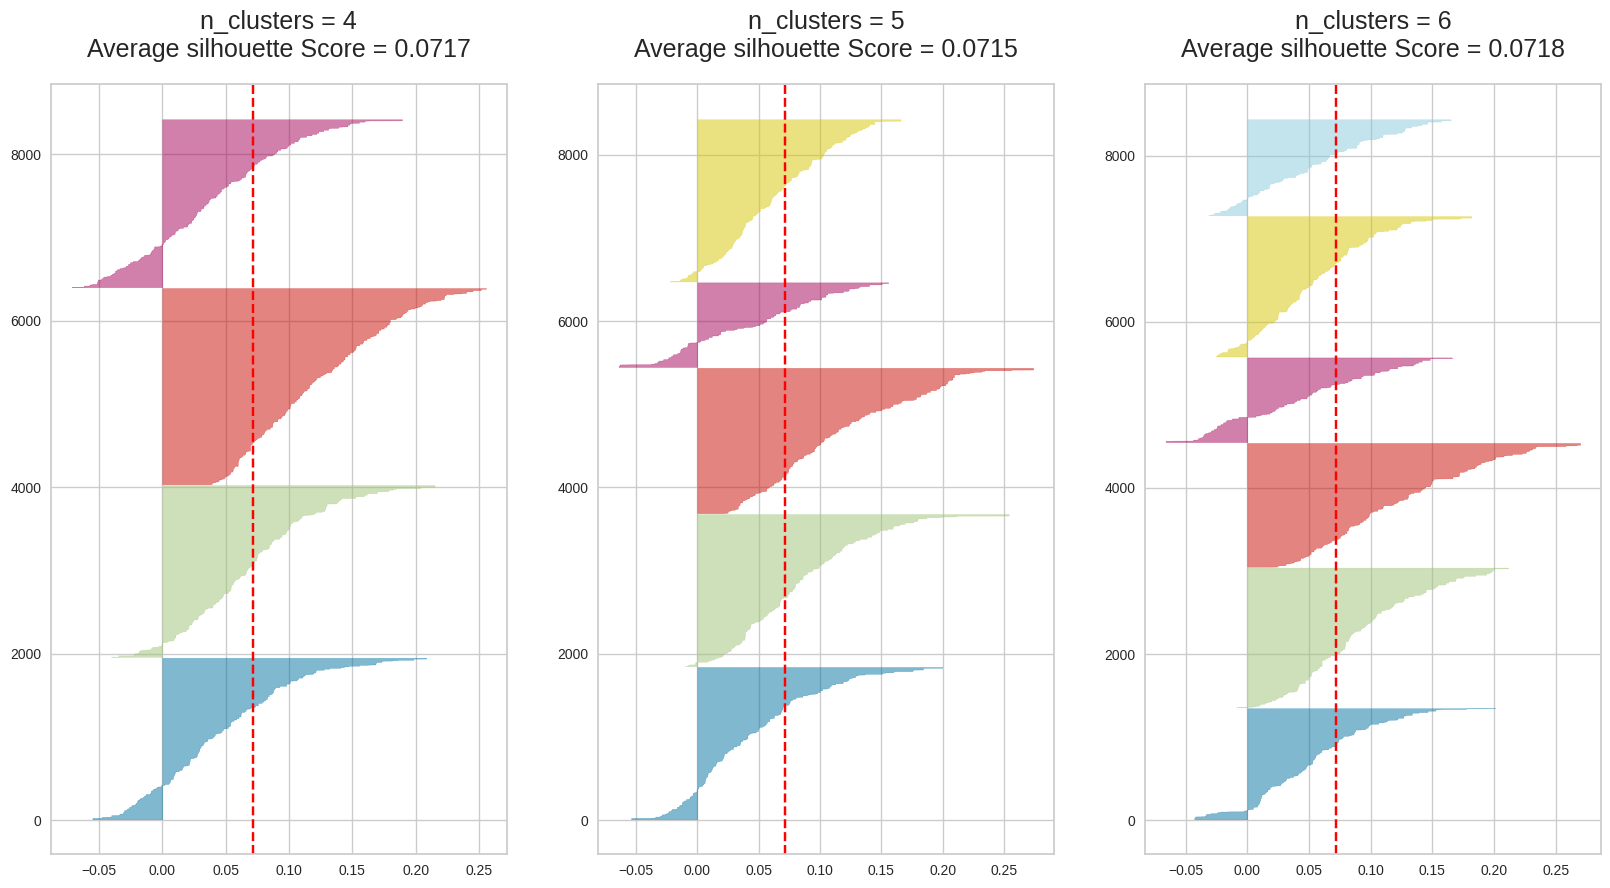

In [181]:
#VISULAIZING THE UOTPUT USING SILHOUETTEVISUALIZER
from yellowbrick.cluster import SilhouetteVisualizer

fig, axs = plt.subplots(1,3, figsize=(20,10))

for k, ax in zip([4,5,6], np.ravel(axs)):
    model = KMeans(k, 
                   n_init='auto',
                   random_state=123)
    visualizer = SilhouetteVisualizer(model, 
                                      colors='yellowbrick',
                                      ax=ax)
    visualizer.fit(X)
    ax.set_title(f"n_clusters = {k}\nAverage silhouette Score = {visualizer.silhouette_score_:.4f}", fontsize=18, y=1.025)

plt.show()

THE CALINSKI_HARABASZ SCORE

In [182]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for k in range(2,20):
    kmns = KMeans(n_clusters=k,
                  n_init='auto',
                  random_state=123)
    kmns.fit(X)
    ch_score = calinski_harabasz_score(X, kmns.labels_)
    ch_scores.append(ch_score) 

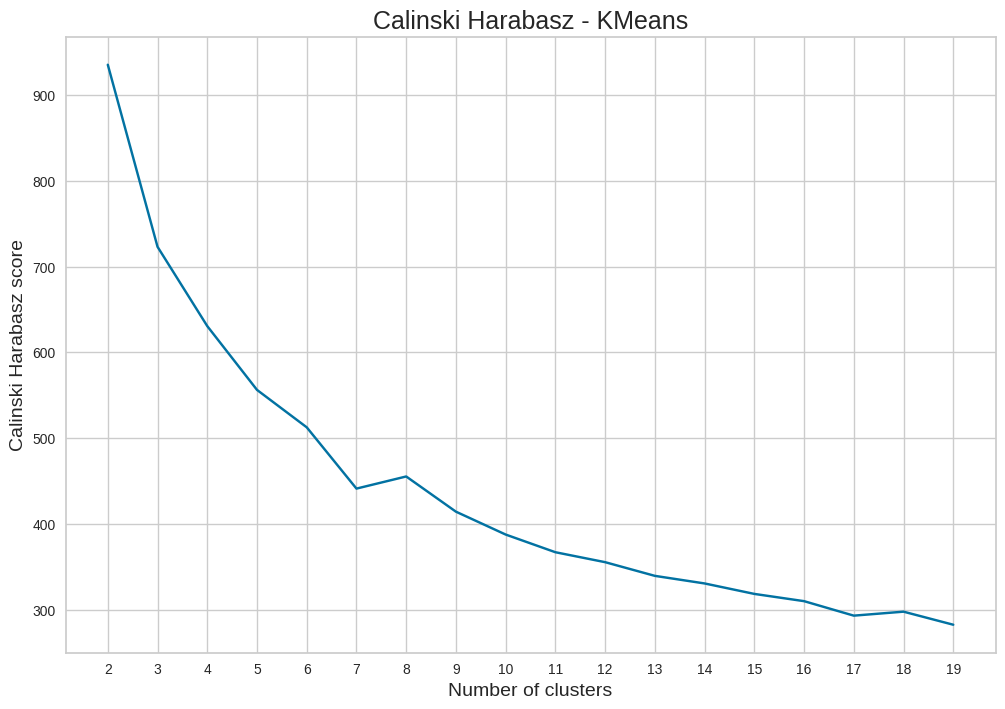

In [183]:
plt.figure(figsize=(12,8))
g = sns.lineplot(y=ch_scores, x=np.arange(2,20))
g.set_ylabel('Calinski Harabasz score', fontsize=14)
g.set_xlabel('Number of clusters', fontsize=14)
g.set_xticks(range(2,20))
g.set_title('Calinski Harabasz - KMeans', fontsize=18)
plt.grid('on')
plt.show()

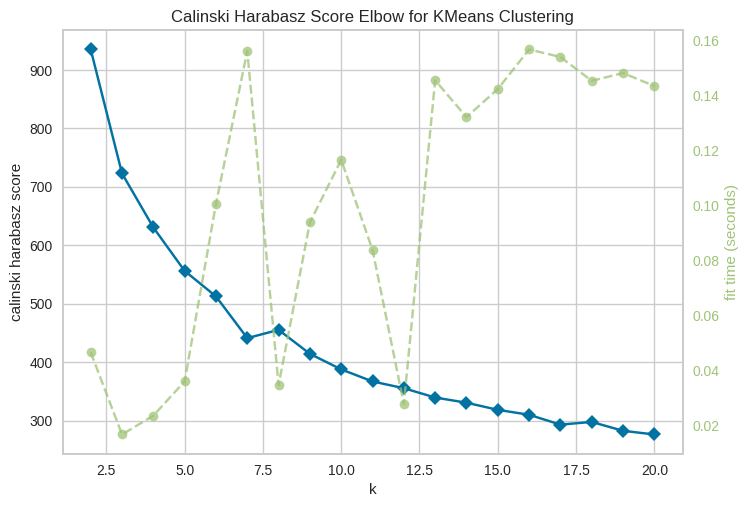

In [184]:
#using yellowbrick library
model = KMeans(n_init='auto',
               random_state=123)

visualizer = KElbowVisualizer(model,
                              metric='calinski_harabasz', 
                              locate_elbow=False,
                              k=20)

visualizer.fit(X)
visualizer.show()
plt.show()

Using Davies-Bouldin scoring method 

In [185]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [186]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_scaled, labels)
print("Davies-Bouldin index:", db_index)



Davies-Bouldin index: 2.941361195981068


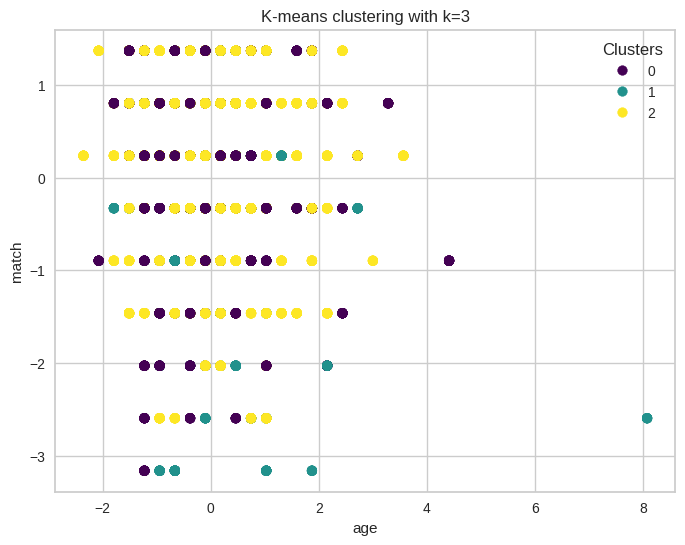

In [188]:
# Visualize the clusters using the first two features (age and ambition)
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.xlabel('age')
plt.ylabel('match')
plt.title('K-means clustering with k=3')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.show()